## Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.manifold import TSNE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectPercentile, VarianceThreshold
from sklearn.feature_selection import RFE,SequentialFeatureSelector

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


Features:

• Elevation: Elevation in meters

• Aspect : Aspect in degrees azimuth

• Slope : Slope in degrees

• Horizontal_Distance_To_Hydrology : Horz Dist to nearest surface water features

• Vertical_Distance_To_Hydrology : Vert Dist to nearest surface water features

• Horizontal_Distance_To_Roadways : Horz Dist to nearest roadway

• Hillshade_9am (0 to 255 index) : Hillshade index at 9am, summer solstice

• Hillshade_Noon (0 to 255 index) : Hillshade index at noon, summer solstice

• Hillshade_3pm (0 to 255 index) : Hillshade index at 3pm, summer solstice

• Horizontal_Distance_To_Fire_Points : Horz Dist to nearest wildfire ignition points

• Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) : Wilderness area designation

• Soil_Type (40 binary columns, 0 = absence or 1 = presence) : Soil Type designation

• Cover_Type (7 types, integers 1 to 7) : Forest Cover Type designation

## Load and Explore the Data

In [2]:
df_train = pd.read_csv("training_dataset.csv")
df_test = pd.read_csv("test_dataset.csv")
df_validate = pd.read_csv("validation_dataset.csv")

In [3]:
display(df_train.head(),df_test.head(),df_validate.head())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,8192,2976,85,23,95,72,2436,246,193,64,...,0,0,0,0,0,0,0,0,0,1
1,14089,3104,233,12,150,40,1503,200,251,186,...,0,0,0,0,0,0,0,0,0,1
2,10246,3385,160,7,937,204,1224,228,242,147,...,0,0,0,0,0,0,0,0,0,1
3,8686,3191,41,14,210,37,3207,221,208,119,...,1,0,0,0,0,0,0,0,0,1
4,9242,2821,297,4,85,1,992,208,238,169,...,0,0,0,0,0,0,0,0,0,1


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,8405,2823,104,20,573,191,2608,249,210,80,...,0,0,0,0,0,0,0,0,0,3
1,13220,2453,157,7,474,183,806,228,241,146,...,0,0,0,0,0,0,0,0,0,3
2,7650,3156,110,6,162,24,1101,230,234,138,...,0,0,0,0,0,0,0,0,0,1
3,14941,2471,186,16,175,67,972,221,250,157,...,0,0,0,0,0,0,0,0,0,3
4,12548,2292,177,29,443,152,1315,219,242,134,...,0,0,0,0,0,0,0,0,0,4


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,6078,2432,147,16,90,2,484,240,236,120,...,0,0,0,0,0,0,0,0,0,6
1,7895,2653,114,14,175,38,2278,244,225,107,...,0,0,0,0,0,0,0,0,0,3
2,6821,3542,315,31,255,130,3218,124,198,206,...,0,0,0,0,0,0,0,0,1,1
3,1594,3191,286,20,30,12,4965,162,235,212,...,0,0,0,0,0,0,0,0,0,1
4,11987,2160,64,37,190,96,240,225,140,15,...,0,0,0,0,0,0,0,0,0,3


In [4]:
data = pd.concat([df_train,df_test,df_validate])

In [5]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,8192,2976,85,23,95,72,2436,246,193,64,...,0,0,0,0,0,0,0,0,0,1
1,14089,3104,233,12,150,40,1503,200,251,186,...,0,0,0,0,0,0,0,0,0,1
2,10246,3385,160,7,937,204,1224,228,242,147,...,0,0,0,0,0,0,0,0,0,1
3,8686,3191,41,14,210,37,3207,221,208,119,...,1,0,0,0,0,0,0,0,0,1
4,9242,2821,297,4,85,1,992,208,238,169,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11309 entries, 0 to 1497
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  11309 non-null  int64
 1   Elevation                           11309 non-null  int64
 2   Aspect                              11309 non-null  int64
 3   Slope                               11309 non-null  int64
 4   Horizontal_Distance_To_Hydrology    11309 non-null  int64
 5   Vertical_Distance_To_Hydrology      11309 non-null  int64
 6   Horizontal_Distance_To_Roadways     11309 non-null  int64
 7   Hillshade_9am                       11309 non-null  int64
 8   Hillshade_Noon                      11309 non-null  int64
 9   Hillshade_3pm                       11309 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  11309 non-null  int64
 11  Wilderness_Area1                    11309 non-null  int64
 12  Wilde

In [7]:
sum_of_nulls = data.isna().sum()
total_nulls = sum_of_nulls.sum()
print(f"Total Null  Count: {total_nulls}")

if total_nulls>0: # if null exsit print column name with null count
    print(sum_of_nulls)


Total Null  Count: 0


In [8]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,...,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000
mean,7596.913520,2735.566540,155.555398,16.802458,226.701123,52.943319,1649.327969,213.580246,218.645061,133.390309,...,0.037581,0.034132,0.001592,0.008754,0.000707,0.003006,0.059775,0.052878,0.037758,4.414537
std,4313.300672,431.413795,108.503237,8.518352,214.613966,63.054654,1273.005160,30.603276,23.106100,46.447891,...,0.190188,0.181576,0.039866,0.093157,0.026589,0.054751,0.237081,0.223800,0.190618,1.863550
min,1.000000,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,58.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3854.000000,2353.000000,67.000000,10.000000,60.000000,5.000000,741.000000,197.000000,206.000000,104.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,7531.000000,2727.000000,125.000000,16.000000,175.000000,34.000000,1283.000000,221.000000,222.000000,137.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11348.000000,3106.000000,252.000000,23.000000,324.000000,82.000000,2186.000000,236.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.000000,3849.000000,360.000000,50.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
data.groupby('Cover_Type').size()

Cover_Type
1     768
2    1298
3    1813
4    1817
5    1985
6    1468
7    2160
dtype: int64

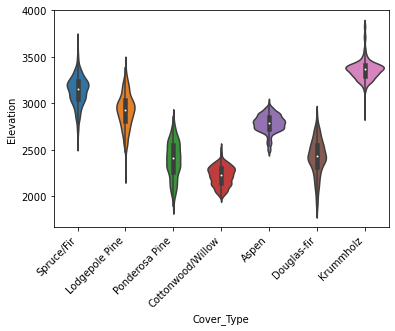

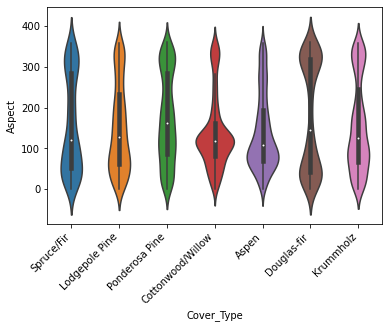

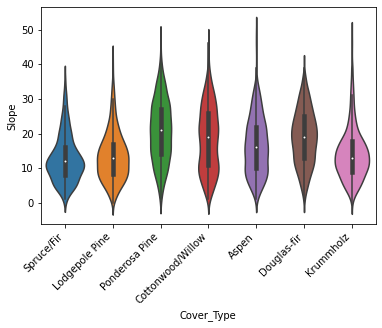

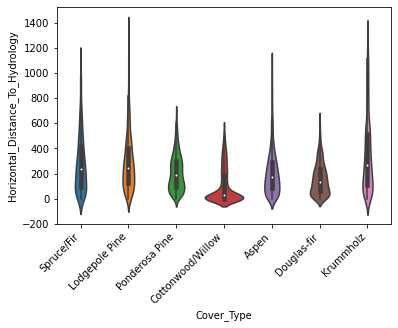

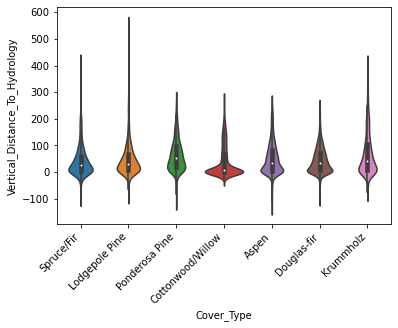

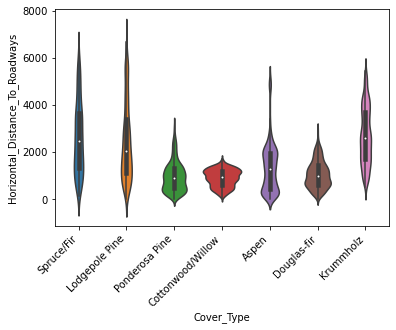

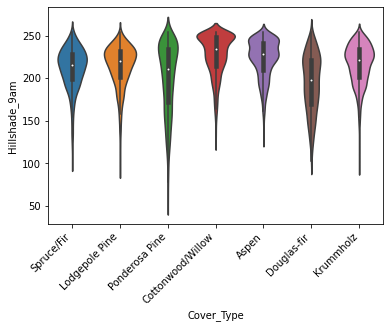

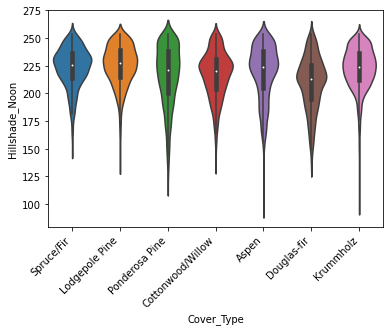

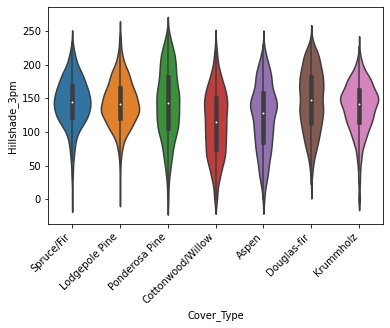

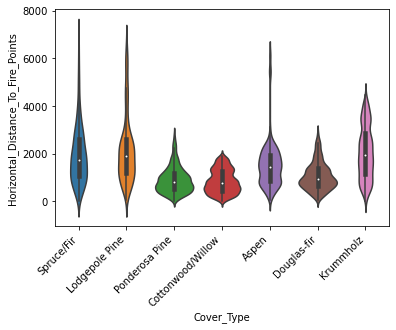

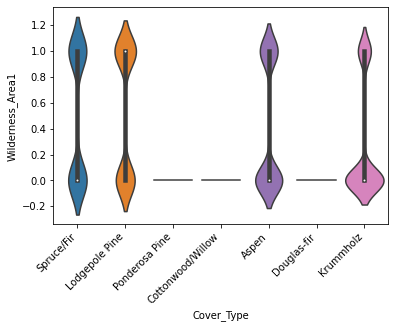

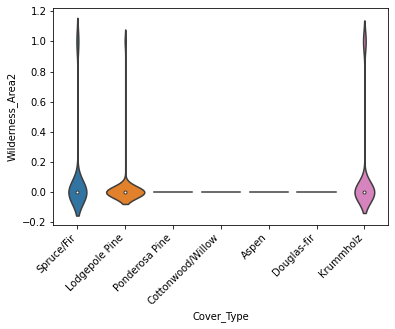

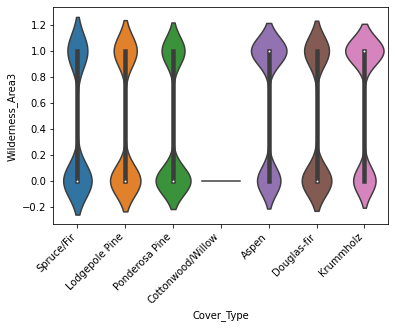

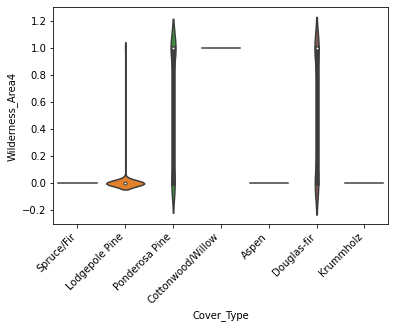

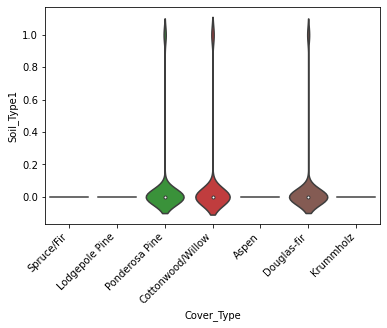

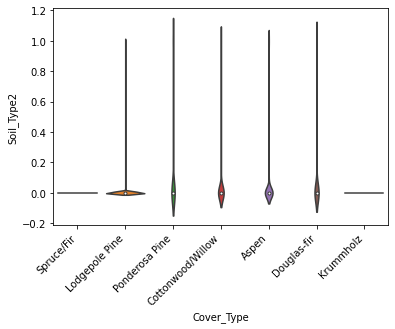

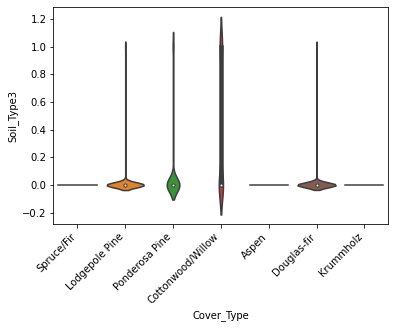

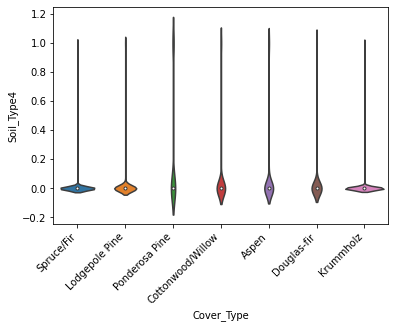

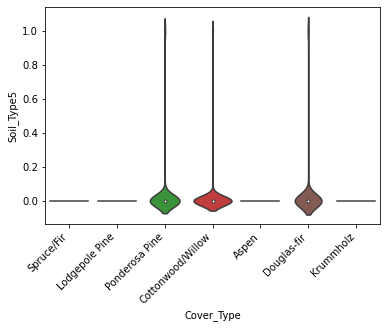

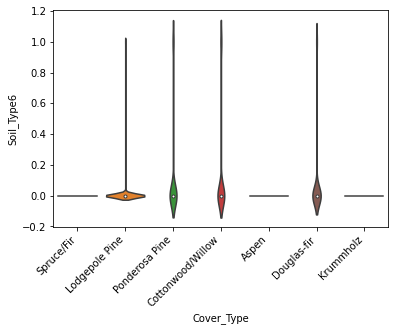

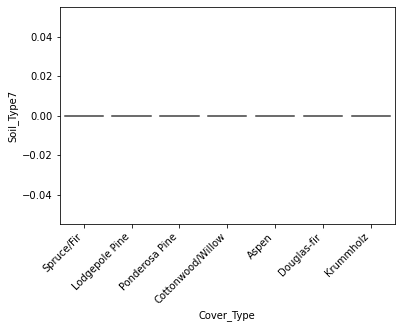

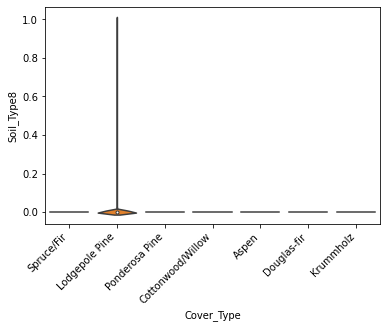

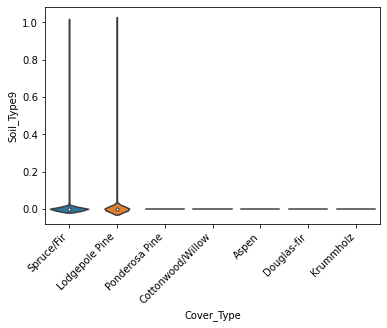

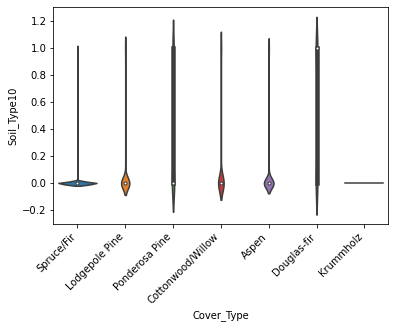

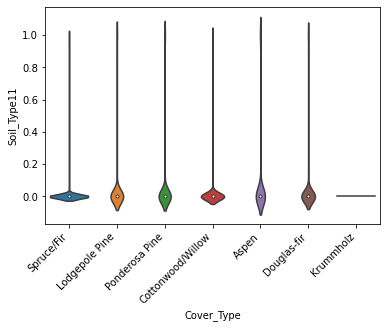

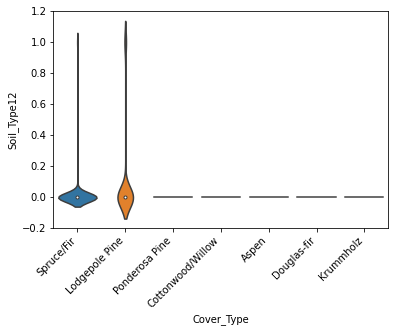

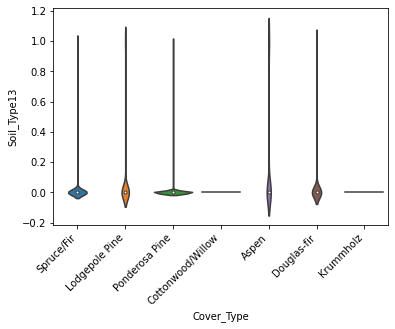

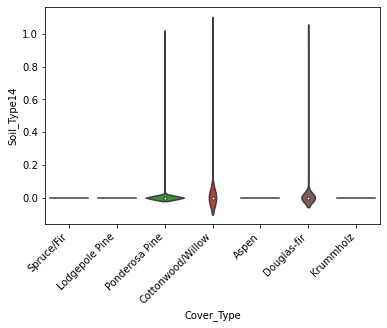

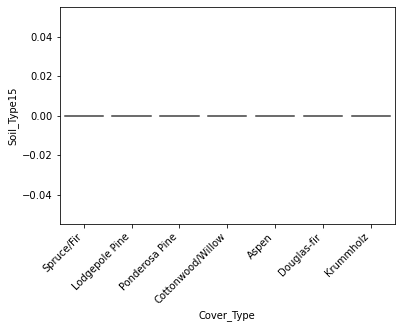

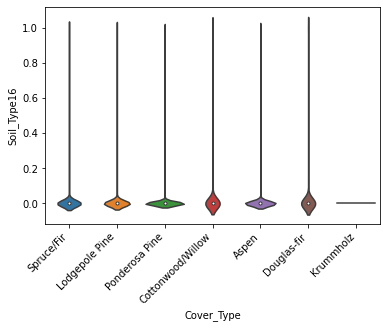

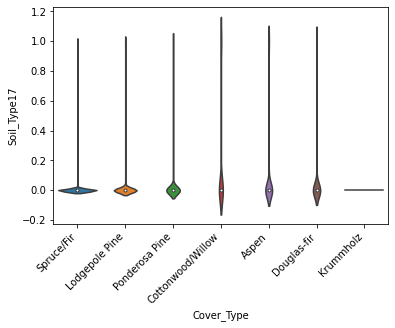

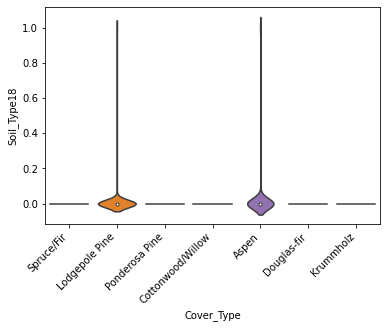

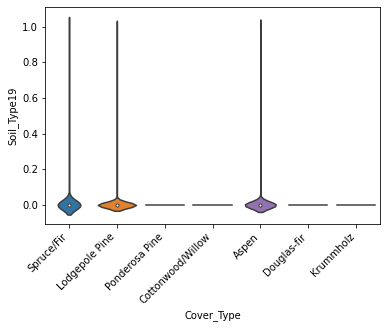

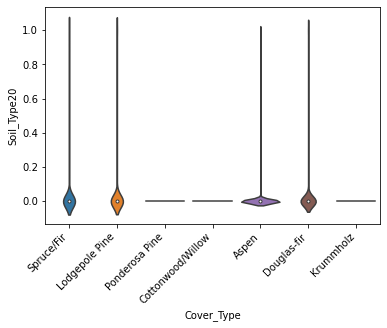

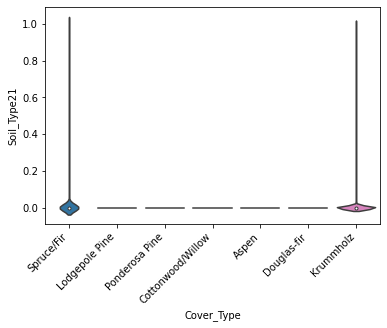

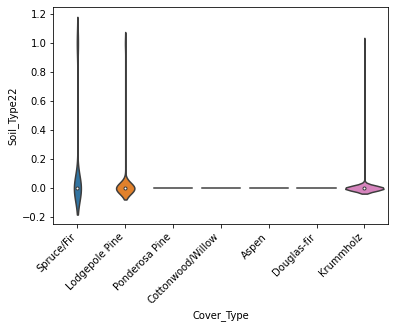

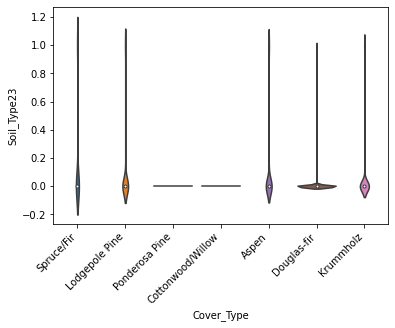

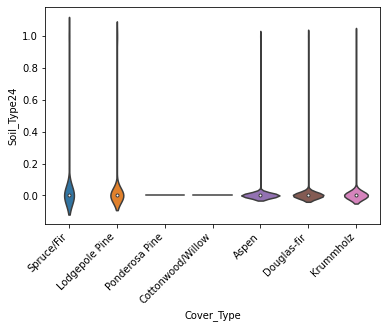

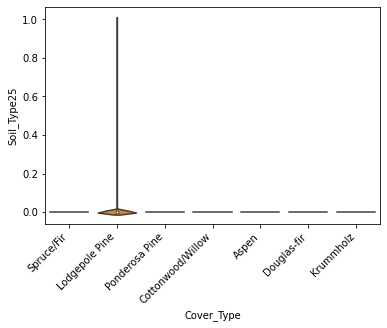

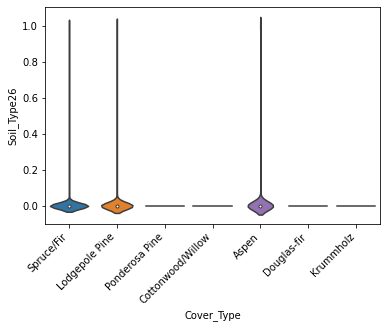

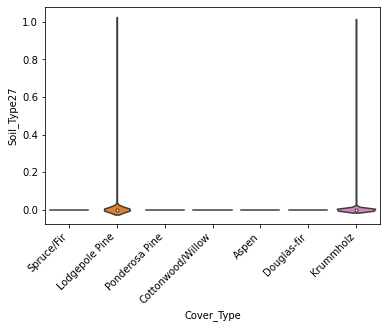

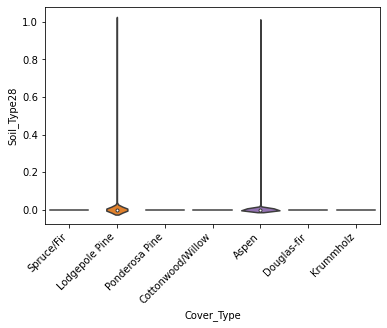

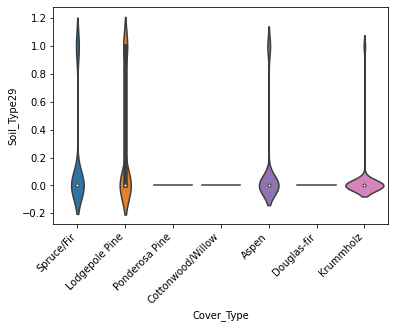

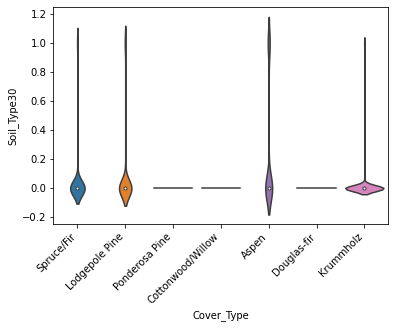

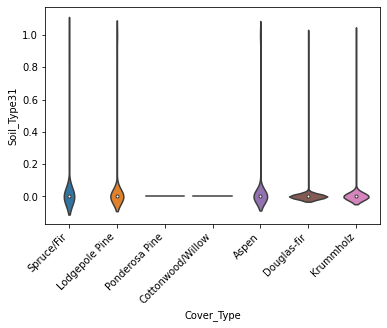

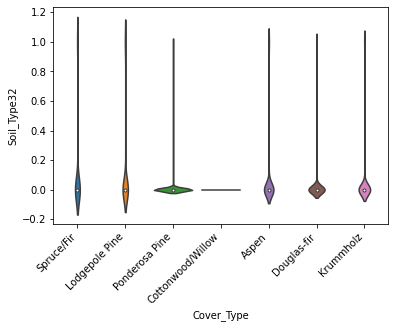

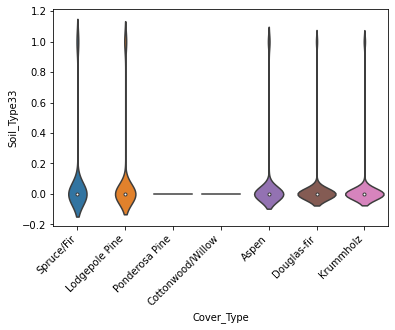

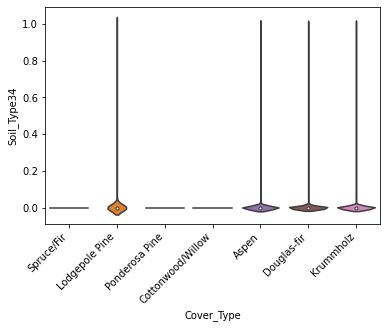

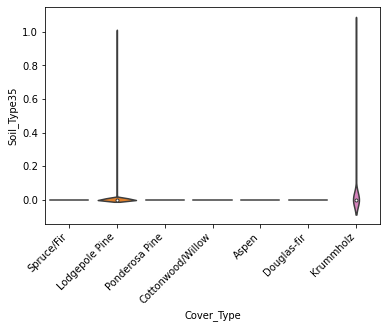

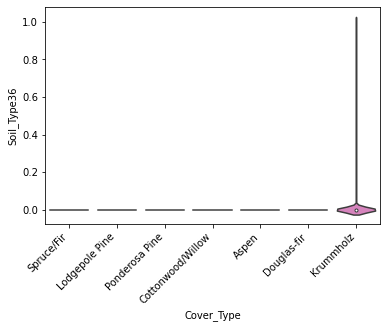

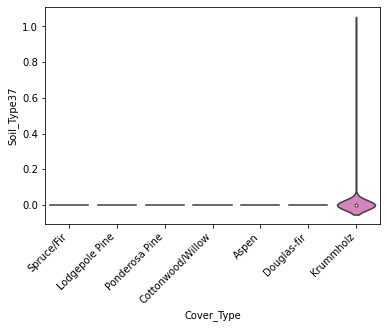

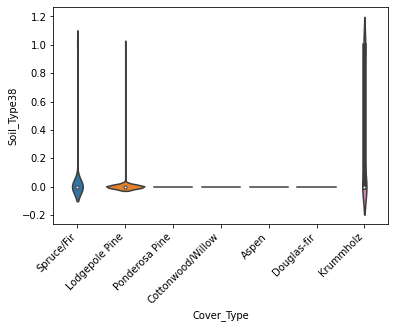

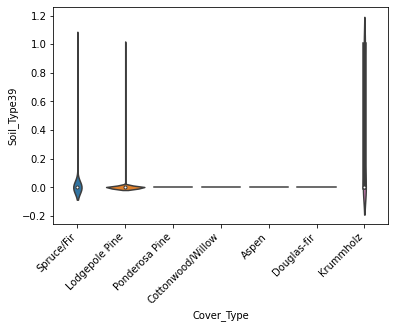

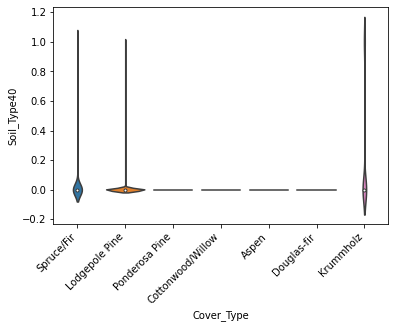

In [10]:
# We will visualize all the attributes using Violin Plot - a combination of box and density plots

#names of all the attributes
cols = data.columns

#number of attributes (exclude target and id)
size = len(cols)-1

#x-axis --> target
x = cols[size]

#y-axis --> attributes
y = cols[1:size]

# Define the mapping of numerical values to text labels
label_mapping = {
    0: "Spruce/Fir",
    1: "Lodgepole Pine",
    2: "Ponderosa Pine",
    3: "Cottonwood/Willow",
    4: "Aspen",
    5: "Douglas-fir",
    6: "Krummholz"
}

# Loop through your data and create violin plots with custom x-axis labels
for i in range(0, size-1):
    sns.violinplot(data=data, x=x, y=y[i], cmap="viridis")  # Specify the desired colormap (e.g., 'viridis')

    x_ticks = plt.xticks()[0]
    # Set the custom x-axis labels based on the mapping
    x_labels = [label_mapping[int(x_tick)] if x_tick in label_mapping else x_tick for x_tick in x_ticks]
    plt.xticks(x_ticks, x_labels, rotation=45, ha='right')
    plt.show()


## Data Preparation

In [11]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]
    col_corr.add(colname)
    return col_corr

In [12]:
data = data.drop(columns='Id')

In [13]:
df_train = df_train.drop(columns='Id')
df_test = df_test.drop(columns='Id')
df_validate = df_validate.drop(columns='Id')

In [14]:
corr_features = correlation(data, 0.7)

In [15]:
print("Removing columns with 0 stdv:")
for c in data.columns:
    if data[c].std()==0: #standard deviation is zero
        print(c)
        data = data.drop(columns=c)
        df_train = df_train.drop(columns=c)
        df_test = df_test.drop(columns=c)
        df_validate = df_validate.drop(columns=c)
print(f"Removing hightly correlated columns :{corr_features}")
data = data.drop(columns=c,axis=1)
df_train = df_train.drop(corr_features,axis=1)
df_test = df_test.drop(corr_features,axis=1)
df_validate = df_validate.drop(corr_features,axis=1)

Removing columns with 0 stdv:
Soil_Type7
Soil_Type15
Removing hightly correlated columns :{'Wilderness_Area4'}


In [16]:
df_train.shape,df_test.shape,df_validate.shape

((8286, 52), (1525, 52), (1498, 52))

## Splitting data

In [17]:
X_train,y_train = df_train.iloc[:,:-1], df_train.iloc[:,-1]
X_train.shape,y_train.shape

((8286, 51), (8286,))

In [18]:
X_test,y_test = df_test.iloc[:,:-1], df_test.iloc[:,-1]
X_test.shape,y_test.shape

((1525, 51), (1525,))

In [19]:
X_val,y_val = df_validate.iloc[:,:-1], df_validate.iloc[:,-1]
X_val.shape,y_val.shape

((1498, 51), (1498,))

In [20]:
display(X_train.head(1),X_test.head(1),X_val.head(1))

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2976,85,23,95,72,2436,246,193,64,836,...,0,0,0,0,0,0,0,0,0,0


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2823,104,20,573,191,2608,249,210,80,1940,...,0,0,0,0,0,0,0,0,0,0


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2432,147,16,90,2,484,240,236,120,1385,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# # Scale the features using StandardScaler
# scaler = StandardScaler()
# X_train, X_test = scaler.fit_transform(Xtrain), scaler.fit_transform(Xtest)

## Modelling

❏ KNN
❏ LogisticRegression
❏ SVM
❏ DecisionTreeClassifier
❏ Naive Bayes Classifier

### Baseline Performance

In [22]:
def classification(Xtrain,ytrain,Xtest,ytest,method):
    method.fit(Xtrain,ytrain)
    y_pred_train = method.predict(Xtrain)
    y_predict = method.predict(Xtest)
    print('accuracy')
    accuracy = accuracy_score(y_test, y_predict)
    print(accuracy)
    print('train f1 score')
    print(f1_score(ytrain, y_pred_train ,average='micro'))
    print('test f1 score')
    print(f1_score(ytest, y_predict ,average='micro'))
    print('-'*20)
    # Generate the classification report
    cm = confusion_matrix(ytest,y_predict)
    print(cm)
    report = classification_report(ytest, y_predict)
    print(report)


    plt.figure(figsize=(15,6))
    sns.heatmap(confusion_matrix(ytest,y_predict),annot=True, cmap='viridis')
    plt.tight_layout()
    plt.show()
    return accuracy

Results for KNeighborsClassifier:


accuracy
0.7383606557377049
train f1 score
0.8853487810765146
test f1 score
0.7383606557377048
--------------------
[[ 44  64   3   0  27   0  59]
 [ 20 111  15   0  56  12  16]
 [  0   1 146  20   3  25   0]
 [  0   0   1 241   0   5   0]
 [  0   1   4   0 209   1   0]
 [  0   3  32  20  10 160   0]
 [  0   1   0   0   0   0 215]]
              precision    recall  f1-score   support

           1       0.69      0.22      0.34       197
           2       0.61      0.48      0.54       230
           3       0.73      0.75      0.74       195
           4       0.86      0.98      0.91       247
           5       0.69      0.97      0.80       215
           6       0.79      0.71      0.75       225
           7       0.74      1.00      0.85       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.70      1525
weighted avg       0.73      0.74      0.71      1525



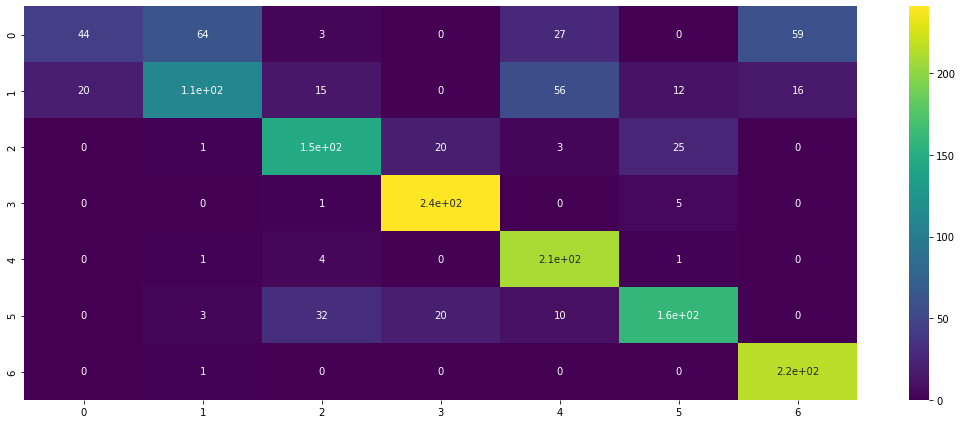

Results for LogisticRegression:


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy
0.6150819672131147
train f1 score
0.7220613082307505
test f1 score
0.6150819672131147
--------------------
[[ 20  66   0   0  21   0  90]
 [ 11 103   7   1  80   6  22]
 [  0   0 104  36  17  38   0]
 [  0   0  25 211   1  10   0]
 [  0  20   3   0 189   3   0]
 [  0   1  58  44  26  96   0]
 [  1   0   0   0   0   0 215]]
              precision    recall  f1-score   support

           1       0.62      0.10      0.17       197
           2       0.54      0.45      0.49       230
           3       0.53      0.53      0.53       195
           4       0.72      0.85      0.78       247
           5       0.57      0.88      0.69       215
           6       0.63      0.43      0.51       225
           7       0.66      1.00      0.79       216

    accuracy                           0.62      1525
   macro avg       0.61      0.61      0.57      1525
weighted avg       0.61      0.62      0.58      1525



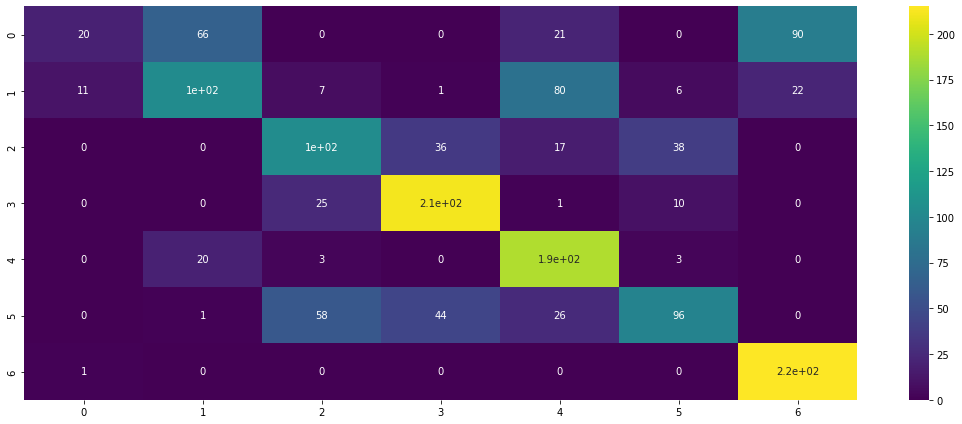

Results for SVC:
accuracy
0.5606557377049181
train f1 score
0.6863384021240647
test f1 score
0.5606557377049181
--------------------
[[  2  70   0   0  32   0  93]
 [  0  93  15   0  96   2  24]
 [  0   0 128  43  17   7   0]
 [  0   0  46 201   0   0   0]
 [  0   9   8   0 198   0   0]
 [  0   0 118  59  31  17   0]
 [  0   0   0   0   0   0 216]]
              precision    recall  f1-score   support

           1       1.00      0.01      0.02       197
           2       0.54      0.40      0.46       230
           3       0.41      0.66      0.50       195
           4       0.66      0.81      0.73       247
           5       0.53      0.92      0.67       215
           6       0.65      0.08      0.14       225
           7       0.65      1.00      0.79       216

    accuracy                           0.56      1525
   macro avg       0.63      0.55      0.47      1525
weighted avg       0.63      0.56      0.48      1525



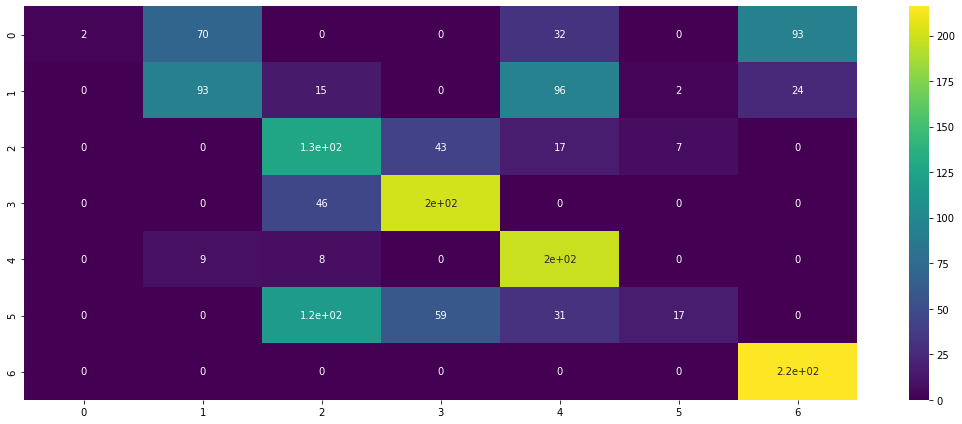

Results for DecisionTreeClassifier:
accuracy
0.7567213114754099
train f1 score
1.0
test f1 score
0.7567213114754099
--------------------
[[ 83  67   0   0   9   1  37]
 [ 34 137  11   0  32   8   8]
 [  0   2 138  13   4  38   0]
 [  0   0  10 229   0   8   0]
 [  3   6   5   0 200   1   0]
 [  0   7  44   9   6 159   0]
 [  6   2   0   0   0   0 208]]
              precision    recall  f1-score   support

           1       0.66      0.42      0.51       197
           2       0.62      0.60      0.61       230
           3       0.66      0.71      0.68       195
           4       0.91      0.93      0.92       247
           5       0.80      0.93      0.86       215
           6       0.74      0.71      0.72       225
           7       0.82      0.96      0.89       216

    accuracy                           0.76      1525
   macro avg       0.74      0.75      0.74      1525
weighted avg       0.75      0.76      0.75      1525



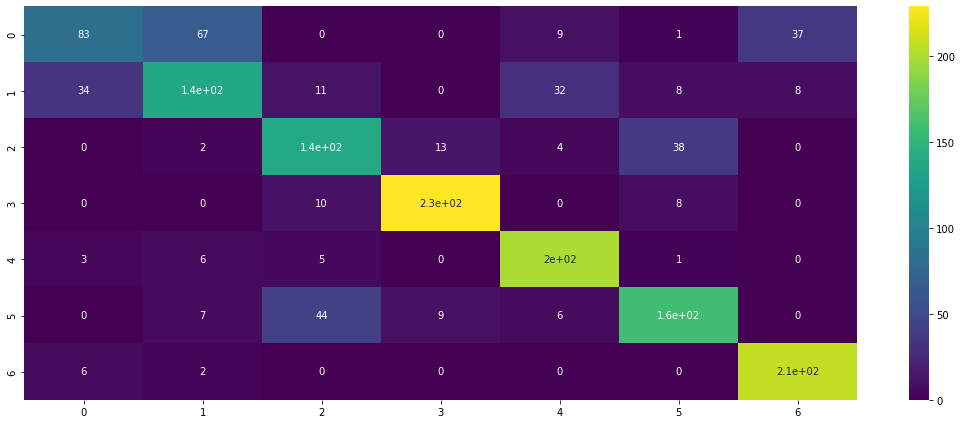

Results for GaussianNB:
accuracy
0.5980327868852459
train f1 score
0.6384262611634082
test f1 score
0.5980327868852459
--------------------
[[145   3   0   0  28   0  21]
 [105  29  23   0  64   3   6]
 [  0   0 153  34   6   2   0]
 [  0   0  35 212   0   0   0]
 [ 15   2  38   0 155   5   0]
 [  3   0 151  33  12  26   0]
 [ 23   1   0   0   0   0 192]]
              precision    recall  f1-score   support

           1       0.50      0.74      0.59       197
           2       0.83      0.13      0.22       230
           3       0.38      0.78      0.51       195
           4       0.76      0.86      0.81       247
           5       0.58      0.72      0.65       215
           6       0.72      0.12      0.20       225
           7       0.88      0.89      0.88       216

    accuracy                           0.60      1525
   macro avg       0.66      0.60      0.55      1525
weighted avg       0.67      0.60      0.55      1525



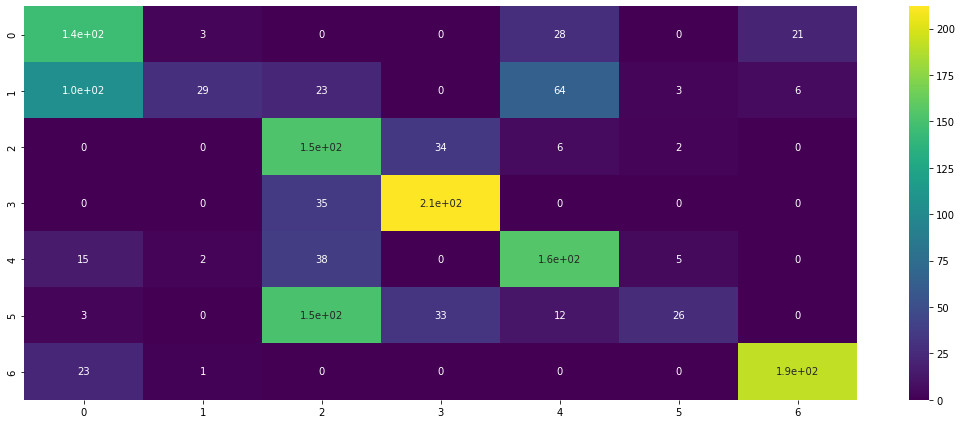

In [23]:
alg = [KNeighborsClassifier(),LogisticRegression(max_iter=5000), SVC(), DecisionTreeClassifier(), GaussianNB()]
accuracy=[]
for model in alg:
    print(f"Results for {model.__class__.__name__}:")
    accuracy.append(classification(X_train, y_train, X_test, y_test, model))

KNeighborsClassifier and DecisionTreeClassifier have top performance

In [24]:
alg = [KNeighborsClassifier(),LogisticRegression(max_iter=5000), SVC(), DecisionTreeClassifier(), GaussianNB()]
knn_acc=accuracy[0]
dt_acc=accuracy[3]

### Feature Selection Methods

In [25]:
def plot_feature_vs_accuracy(accuracy_selection_method, baseline_acc, scaleX,Xticks,c,
                            label='', baseline_label='',title='Features vs. Accuracy Plot'):
    plt.figure(figsize=(20, 10))
    plt.plot(scaleX, accuracy_selection_method, label=label)
    plt.axhline(y=baseline_acc, color=c, linestyle='--', label=baseline_label)
    plt.xticks(Xticks)

    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy Score')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

#### Filter based

Mutual Information Gain

In [26]:
features = data.columns
len(features)

52

In [69]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

In [74]:
# Feature Selection using Mutual Information Gain

# range of k values
k_values = range(1, X_train.shape[1])

# store accuracy score
accuracy_info_gain_knn = []
accuracy_info_gain_dt = []

f1_scores_anova = []
get_selected_columns  ={}

for k in k_values:
    selector = SelectKBest(mutual_info_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    cols = selector.get_support(indices=True)
    selected_columns = X_train.iloc[:,cols].columns.tolist()
    selected_columns

    get_selected_columns.update({k:selected_columns})

    # Train and evaluate classifiers
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_selected, y_train)
    knn_pred = knn.predict(X_test_selected)
    # knn_f1 = f1_score(y_test, knn_pred, average='weighted')
    knn_accuracy = accuracy_score(y_test, knn_pred)
    accuracy_info_gain_knn.append(knn_accuracy)

    dt = DecisionTreeClassifier()
    dt.fit(X_train_selected, y_train)
    nb_pred = dt.predict(X_test_selected)
    # nb_f1 = f1_score(y_test, nb_pred, average='weighted')
    dt_accuracy = accuracy_score(y_test, knn_pred)
    accuracy_info_gain_dt.append(dt_accuracy)

In [28]:
print(get_selected_columns)

{1: ['Elevation'], 2: ['Elevation', 'Horizontal_Distance_To_Roadways'], 3: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points'], 4: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1'], 5: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type10'], 6: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area3', 'Soil_Type10'], 7: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area3', 'Soil_Type10'], 8: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area3', 'Soil_Type10', 'Soil_Type39'], 9: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Horizontal_Distance_To_Fire_Points', 'Wilde

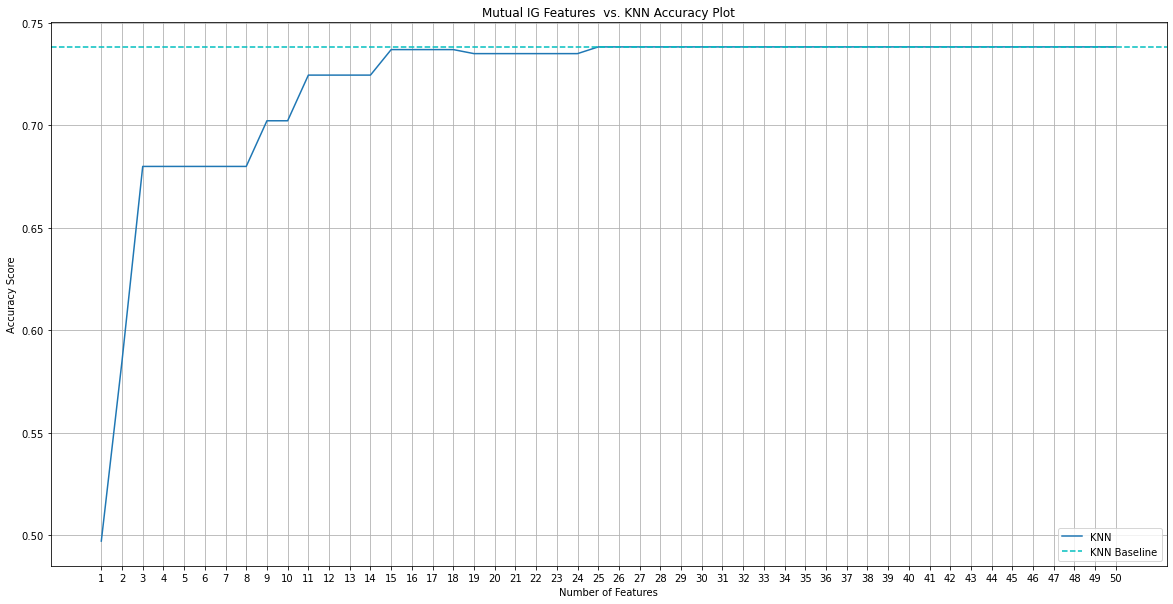

In [75]:
plot_feature_vs_accuracy(accuracy_info_gain_knn, knn_acc, range(1, len(features)-1),range(1, len(features)-1),'c',
                            label='KNN',baseline_label='KNN Baseline' , title='Mutual IG Features  vs. KNN Accuracy Plot')

for KNN, The best number of features is 16 with accuracy equal to 0.737, it's true that at 28 feature the accuracy increses by 0.001 but this increse is unremarkable to increase the complexity of the data.

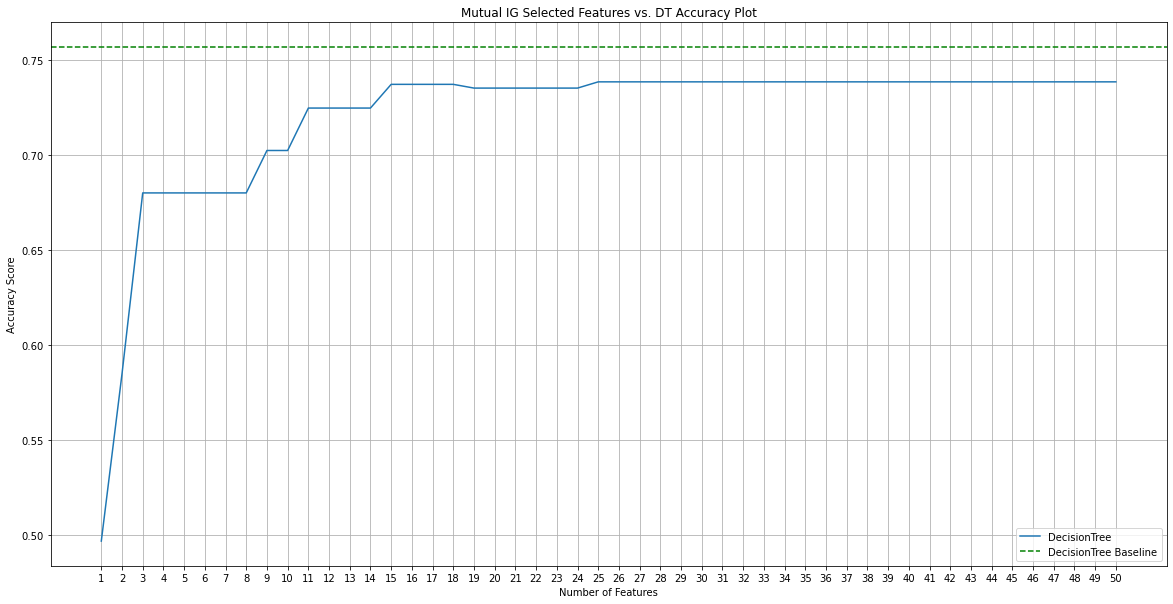

In [76]:
plot_feature_vs_accuracy(accuracy_info_gain_dt, dt_acc, range(1, len(features)-1),range(1, len(features)-1),'g',
                           label='DecisionTree',baseline_label='DecisionTree Baseline', title='Mutual IG Selected Features vs. DT Accuracy Plot')

for DT, The best number of features is also 16 with accuracy equal to 0.737

#### Train the models on the best filter features

In [77]:
X_train_q2f = X_train[get_selected_columns[15]]
X_test_q2f = X_test[get_selected_columns[15]]

Results for KNeighborsClassifier:
accuracy
0.7370491803278688
train f1 score
0.8799179338643495
test f1 score
0.7370491803278688
--------------------
[[ 46  70   2   0  25   0  54]
 [ 20 111  13   0  54  13  19]
 [  0   1 139  24   5  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   2  28  27  10 158   0]
 [  0   3   0   0   0   0 213]]
              precision    recall  f1-score   support

           1       0.70      0.23      0.35       197
           2       0.59      0.48      0.53       230
           3       0.74      0.71      0.73       195
           4       0.83      1.00      0.90       247
           5       0.69      0.98      0.81       215
           6       0.80      0.70      0.75       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.70      1525
weighted avg       0.73      0.74      0.71      1525



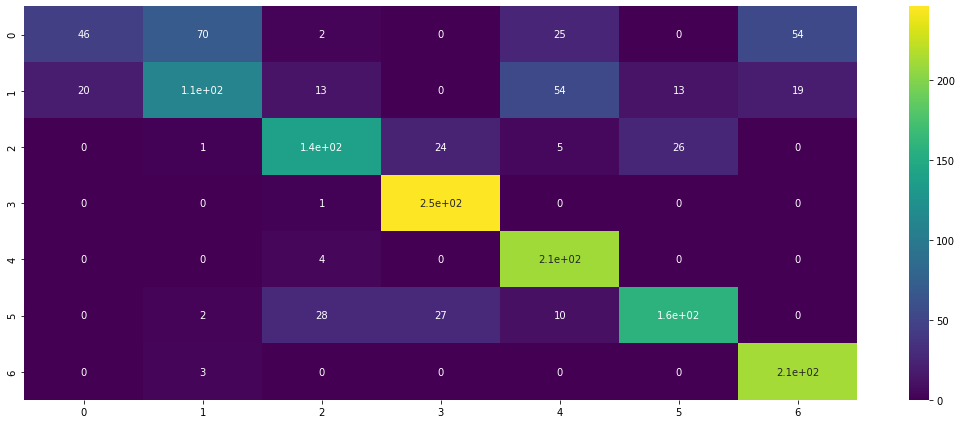

Results for DecisionTreeClassifier:
accuracy
0.7488524590163934
train f1 score
1.0
test f1 score
0.7488524590163934
--------------------
[[ 82  69   0   0   7   0  39]
 [ 33 134   8   0  34  11  10]
 [  0   2 136  18   6  33   0]
 [  0   0  13 230   0   4   0]
 [  1  11   5   0 196   2   0]
 [  1   2  42  13   9 158   0]
 [  7   3   0   0   0   0 206]]
              precision    recall  f1-score   support

           1       0.66      0.42      0.51       197
           2       0.61      0.58      0.59       230
           3       0.67      0.70      0.68       195
           4       0.88      0.93      0.91       247
           5       0.78      0.91      0.84       215
           6       0.76      0.70      0.73       225
           7       0.81      0.95      0.87       216

    accuracy                           0.75      1525
   macro avg       0.74      0.74      0.73      1525
weighted avg       0.74      0.75      0.74      1525



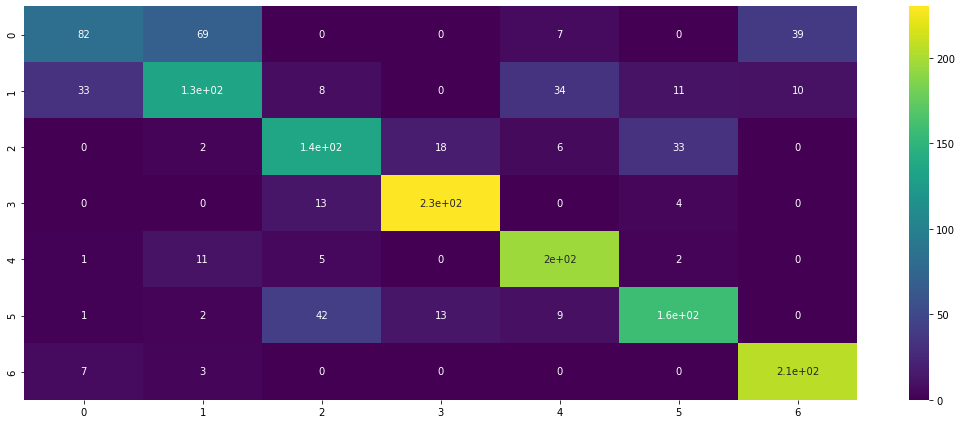

In [78]:
model_best_q2={}
models_q2 = [KNeighborsClassifier(),DecisionTreeClassifier()]
for model in models_q2:
  print(f"Results for {model.__class__.__name__}:")
  accuracy_q2 = classification(X_train_q2f, y_train, X_test_q2f, y_test, model)
  model_best_q2.update({model.__class__.__name__+"/Filter":accuracy_q2})

#### wrapper based

In [82]:
# Feature Selection using Sequential Feature Selector

# range of k values
k_values = range(1, X_train.shape[1])
val=[10,15,17,20,25]

# store accuracy score
accuracy_seq_knn = []
accuracy_seq_dt = []

knn_top_feats=[]
dt_top_feats=[]
get_knn_top_feats ={}
get_dt_top_feats={}
for k in val:
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_sfs = SequentialFeatureSelector(knn_model,n_features_to_select=k,scoring='accuracy',direction='forward')
    knn_sfs.fit(X_train,y_train)
    knn_idxes = knn_sfs.get_support(indices=True)
    knn_top_feats = X_train.columns[knn_idxes]
    print(f'Selected features are {knn_top_feats}')

    get_knn_top_feats.update({k:knn_top_feats})

    dt_model = DecisionTreeClassifier()
    dt_sfs = SequentialFeatureSelector(dt_model,n_features_to_select=k,scoring='accuracy',direction='forward')
    dt_sfs.fit(X_train,y_train)
    dt_idxes = dt_sfs.get_support(indices=True)
    dt_top_feats = X_train.columns[dt_idxes]
    print(f'Selected features are {dt_top_feats}')
    get_dt_top_feats.update({k:dt_top_feats})

    # Train and evaluate classifiers

    knn = KNeighborsClassifier(n_neighbors=5)
    knn = knn.fit(X_train[knn_top_feats], y_train)
    knn_pred = knn.predict(X_test[knn_top_feats])
    knn_accuracy = accuracy_score(y_test, knn_pred)
    accuracy_seq_knn.append(knn_accuracy)

    dt = DecisionTreeClassifier()
    dt = dt.fit(X_train[dt_top_feats], y_train)
    dt_pred = dt.predict(X_test[dt_top_feats])
    dt_accuracy = accuracy_score(y_test, dt_pred)
    accuracy_seq_dt.append(dt_accuracy)

Selected features are Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')
Selected features are Index(['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area3', 'Soil_Type4', 'Soil_Type10', 'Soil_Type13',
       'Soil_Type35'],
      dtype='object')
Selected features are Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Soil_Type1', 'Soil_Type2'],
      dtype='object')
Selected features are

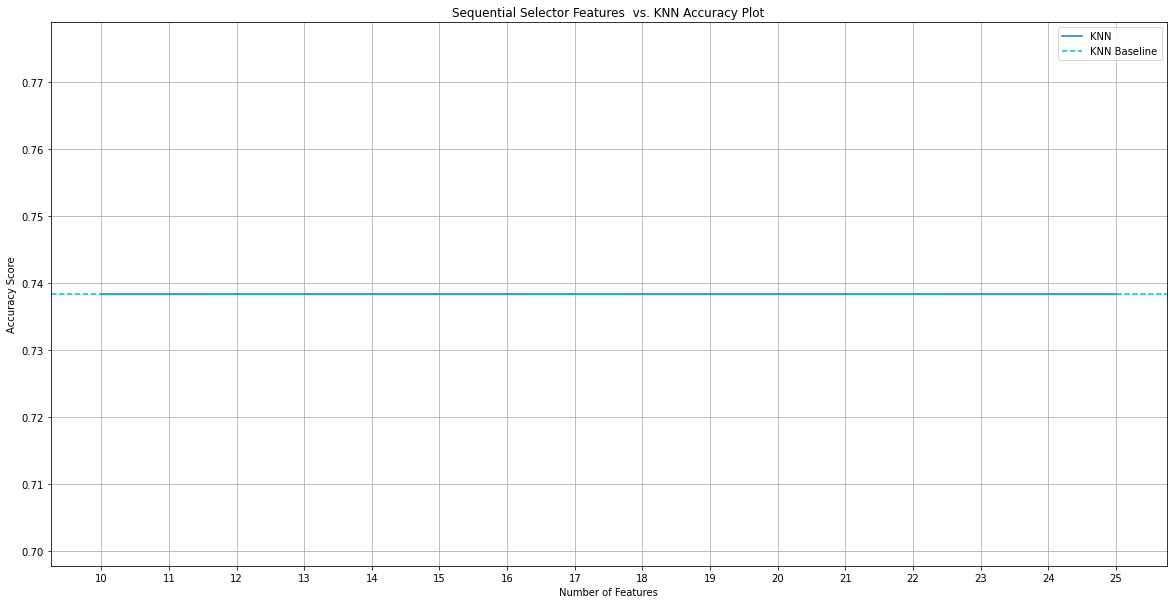

In [92]:
plot_feature_vs_accuracy(accuracy_seq_knn, knn_acc, val,range(val[0], val[-1]+1),'c',
                            label='KNN',baseline_label='KNN Baseline' , title='Sequential Selector Features  vs. KNN Accuracy Plot')

for KNN, at different number of features accuracy is fixed at 0.73

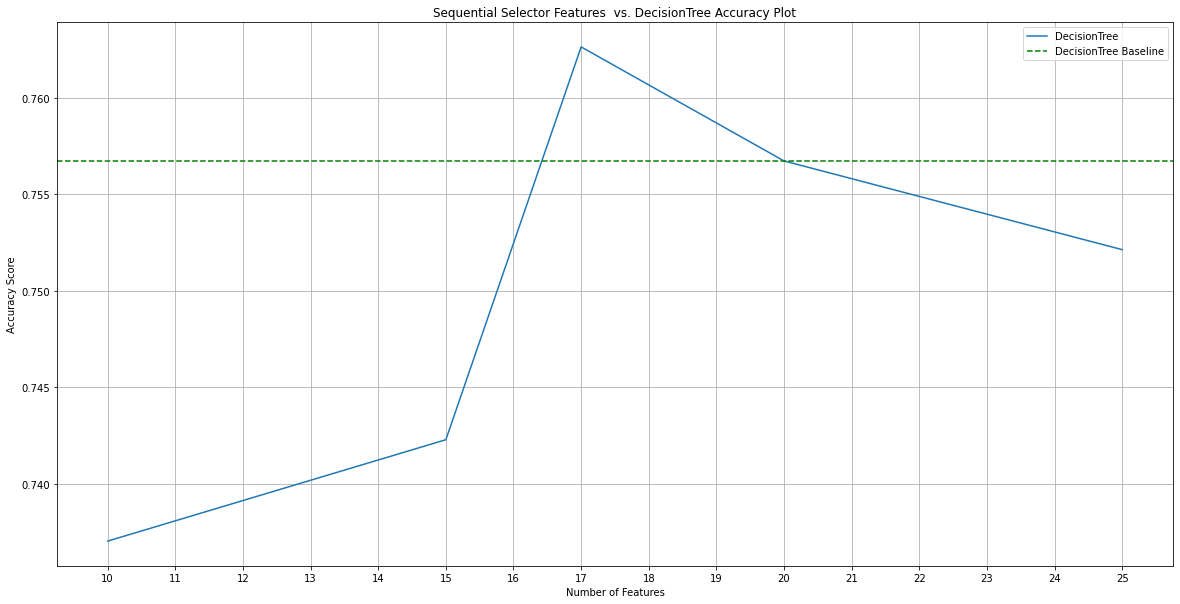

In [93]:
plot_feature_vs_accuracy(accuracy_seq_dt, dt_acc, val,range(val[0], val[-1]+1),'g',
                            label='DecisionTree',baseline_label='DecisionTree Baseline' , title='Sequential Selector Features  vs. DecisionTree Accuracy Plot')

for DT, best number of features is 17 giving acccuracy of 0.76.

#### Train the models on the best wrapper features

In [86]:
X_train_q2w_knn = X_train[get_knn_top_feats[17]]#
X_test_q2w_knn = X_test[get_knn_top_feats[17]]
X_train_q2w_dt = X_train[get_knn_top_feats[17]]#
X_test_q2w_dt = X_test[get_knn_top_feats[17]]

In [50]:
accuracy_q2

0.759344262295082

In [56]:
models_q2[0]

KNeighborsClassifier()

Results for KNeighborsClassifier:
accuracy
0.7383606557377049
train f1 score
0.8853487810765146
test f1 score
0.7383606557377048
--------------------
[[ 44  64   3   0  27   0  59]
 [ 20 111  15   0  56  12  16]
 [  0   1 146  20   3  25   0]
 [  0   0   1 241   0   5   0]
 [  0   1   4   0 209   1   0]
 [  0   3  32  20  10 160   0]
 [  0   1   0   0   0   0 215]]
              precision    recall  f1-score   support

           1       0.69      0.22      0.34       197
           2       0.61      0.48      0.54       230
           3       0.73      0.75      0.74       195
           4       0.86      0.98      0.91       247
           5       0.69      0.97      0.80       215
           6       0.79      0.71      0.75       225
           7       0.74      1.00      0.85       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.70      1525
weighted avg       0.73      0.74      0.71      1525



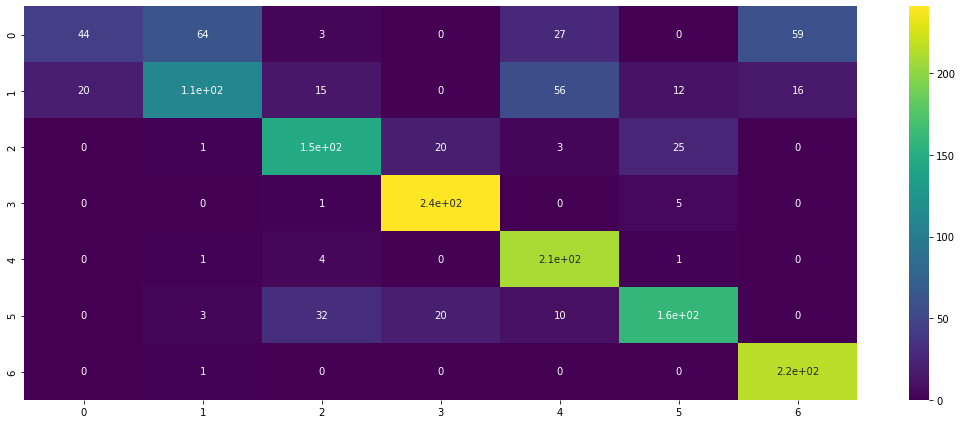

Results for DecisionTreeClassifier:
accuracy
0.740983606557377
train f1 score
1.0
test f1 score
0.740983606557377
--------------------
[[ 72  71   1   0  10   2  41]
 [ 33 138   8   0  36   9   6]
 [  0   2 142  15   3  33   0]
 [  0   1  11 226   0   9   0]
 [  4  11   4   0 195   0   1]
 [  0   6  52  10   9 148   0]
 [  3   4   0   0   0   0 209]]
              precision    recall  f1-score   support

           1       0.64      0.37      0.47       197
           2       0.59      0.60      0.60       230
           3       0.65      0.73      0.69       195
           4       0.90      0.91      0.91       247
           5       0.77      0.91      0.83       215
           6       0.74      0.66      0.69       225
           7       0.81      0.97      0.88       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.72      1525
weighted avg       0.73      0.74      0.73      1525



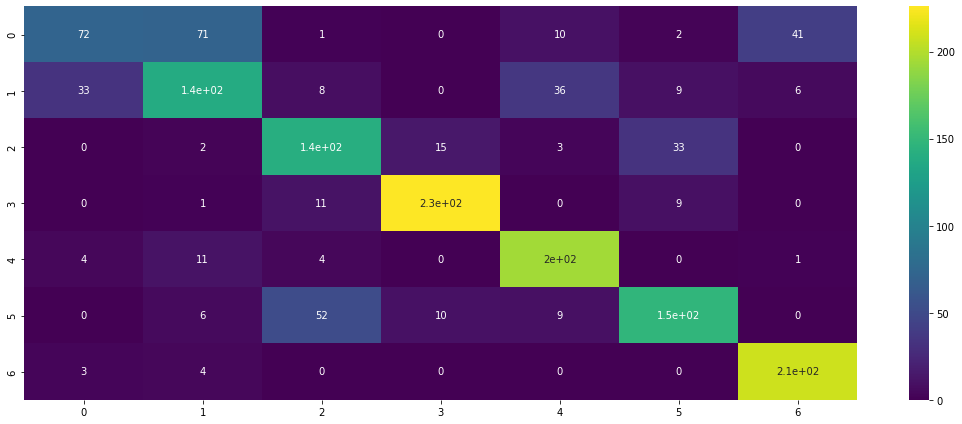

In [87]:
model_knn = KNeighborsClassifier()
print(f"Results for {model_knn.__class__.__name__}:")
accuracy_q2 = classification(X_train_q2w_knn, y_train, X_test_q2w_knn, y_test, model_knn)
model_best_q2.update({model_knn.__class__.__name__+"/Wrapper":accuracy_q2})

model_dt =  DecisionTreeClassifier()
print(f"Results for {model_dt.__class__.__name__}:")
accuracy_q2 = classification(X_train_q2w_dt, y_train, X_test_q2w_dt, y_test, model_dt)
model_best_q2.update({model_dt.__class__.__name__+"/Wrapper":accuracy_q2})

In [88]:
model_best_q2

{'KNeighborsClassifier/Filter': 0.7370491803278688,
 'DecisionTreeClassifier/Filter': 0.7488524590163934,
 'KNeighborsClassifier/Wrapper': 0.7383606557377049,
 'DecisionTreeClassifier/Wrapper': 0.740983606557377}

DecisionTreeClassifier Filter Based Selection is the Best Model

### PCA

In [121]:
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(X_train) # normalizing the features
x_test = StandardScaler().fit_transform(X_test) # normalizing the features


In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_train = pca.fit_transform(X_train)
pc_test = pca.fit_transform(X_test)

In [131]:
train_pc = pd.DataFrame(data = pc_train, columns = ['pc1', 'pc2'])
test_pc = pd.DataFrame(data = pc_test, columns = ['pc1', 'pc2'])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.70989029 0.23328688]


In [132]:
display(train_pc,test_pc)

,pc1,pc2
0,328.382187,-979.529099
1,-220.056942,-211.828576
2,-573.491331,-377.343296
3,1005.961922,-1407.564868
4,-1190.747049,-633.073134
...,...,...
8281,2830.084942,626.549851
8282,1920.596155,-374.117539
8283,1570.417649,1219.201927
8284,3785.655966,-609.677833


,pc1,pc2
0,1042.627437,-74.575709
1,-1059.596217,27.559373
2,-255.329208,565.828538
3,-714.552765,284.510948
4,-734.459214,-345.602169
...,...,...
1520,1977.889505,-2840.894071
1521,-1079.845755,873.506798
1522,-1583.894526,-349.572977
1523,-1259.137238,-450.446694


Results for KNeighborsClassifier:
accuracy
0.41704918032786886
train f1 score
0.6358918657977312
test f1 score
0.41704918032786886
--------------------
[[ 19  51  12  10  38  13  54]
 [ 18  63  20  20  45  16  48]
 [  2   3  89  45  17  28  11]
 [  2   0  70 140  16  17   2]
 [  4  12  23  16 134  10  16]
 [  3   6  69  39  29  63  16]
 [  7  26  17   3  25  10 128]]
              precision    recall  f1-score   support

           1       0.35      0.10      0.15       197
           2       0.39      0.27      0.32       230
           3       0.30      0.46      0.36       195
           4       0.51      0.57      0.54       247
           5       0.44      0.62      0.52       215
           6       0.40      0.28      0.33       225
           7       0.47      0.59      0.52       216

    accuracy                           0.42      1525
   macro avg       0.41      0.41      0.39      1525
weighted avg       0.41      0.42      0.40      1525



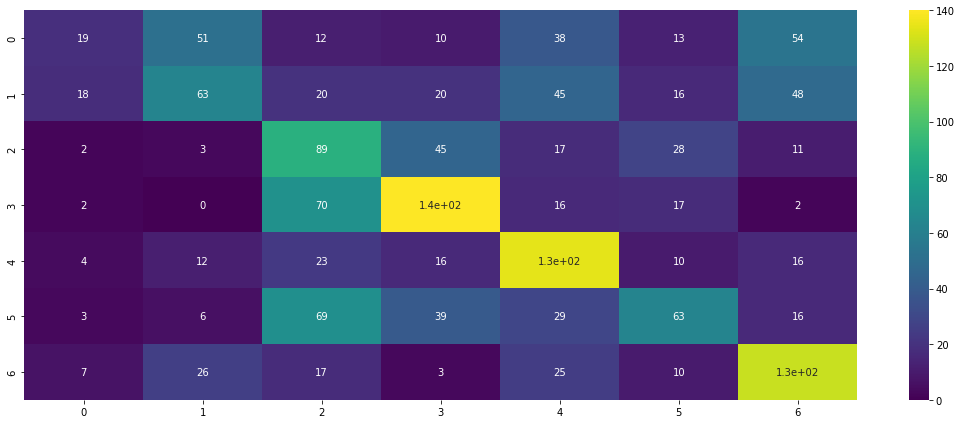

Results for DecisionTreeClassifier:
accuracy
0.3652459016393443
train f1 score
1.0
test f1 score
0.3652459016393443
--------------------
[[ 43  46  16   7  31  11  43]
 [ 27  68  20  11  34  17  53]
 [  3   5  68  31  24  46  18]
 [  3   7  67  95  28  33  14]
 [  7  27  24  13 102  18  24]
 [  5  10  55  37  34  65  19]
 [ 26  28   9   4  22  11 116]]
              precision    recall  f1-score   support

           1       0.38      0.22      0.28       197
           2       0.36      0.30      0.32       230
           3       0.26      0.35      0.30       195
           4       0.48      0.38      0.43       247
           5       0.37      0.47      0.42       215
           6       0.32      0.29      0.31       225
           7       0.40      0.54      0.46       216

    accuracy                           0.37      1525
   macro avg       0.37      0.36      0.36      1525
weighted avg       0.37      0.37      0.36      1525



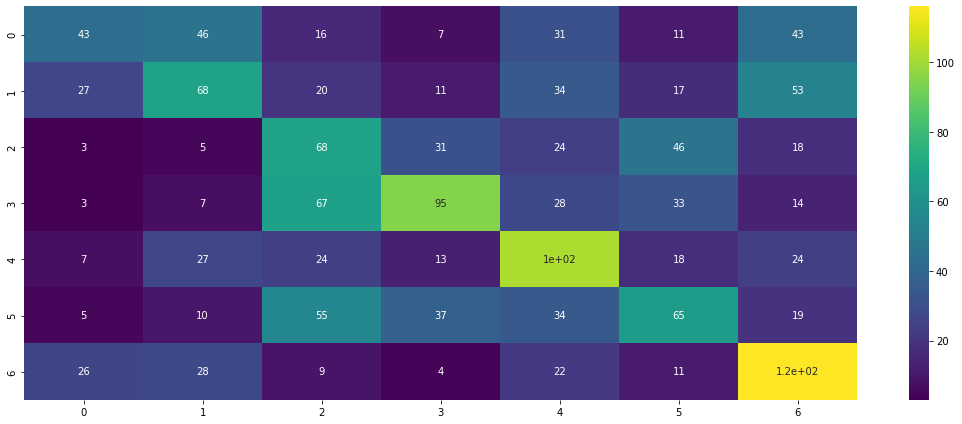

In [133]:
alg = [KNeighborsClassifier(),DecisionTreeClassifier()]
accuracy=[]
for model in alg:
    print(f"Results for {model.__class__.__name__}:")
    accuracy.append(classification(train_pc, y_train, test_pc, y_test, model))

Dimesionality reduction vs Feature Selection Method

PCA preformed worst than Feature selection methods

### Ensembles Methods

### Supervised & Unsupervised Combination via PKI